### consiguen mas puntos los jovenes de la NBA que las viejas glorias

Desde hace un tiempo, al ver los partidos y resultados de los partidos de temporada y pre playoff de la liga nacional Americana de baloncesto, me da la sensación de que los jugadores jóvenes están anotando más puntos de los mayores y exjugadores de la liga.

En su época la ex Leyenda de la NBA y de los Lakers Pau Gasol. AKA. PAUGA(para los amigos), Tiene unas estadísticas inferiores a muchos de los jóvenes. Que con un futuro, aunque no demasiada cerda de ser una leyenda del deporte estrella Estadounidense, muestran unos resultados estadísticos más elevados que PAUGA.

Realizaremos un test Hipotético en el que nos centraremos en los jugadores jóvenes (no mayores de 28 años) y con un tiempo por partido de media de más de 27 minutos, así eliminamos a los jugadores mediocres del medio y nos centramos en las posibles futuras estrellas y leyendas del Baloncesto Americano.

Comprobaré si existe una gran diferencia entre las posiciones y cuál es la posición en la que los jugadores meten más puntos. ¿Se están metiendo más puntos de media por jugador que respecto al año anterior?



Nos centramos solo en los jugadores importantes ( más de 27 min por partido)

- Me da la sensación de que durante este curso los jugadores importantes están metiendo muchísimos puntos, creo que alrededor de unos 18ppp, compruébalo.

- Además me da la sensación de que los jugadores jóvenes sub 27 están dando un paso adelante y meten más puntos que los mayores.

- Me gustaría comprobar  si hay diferencia entre posiciones, y cual son en las posiciones en las que los jugadores meten más puntos.

- ¿Se están metiendo más puntos de media por jugador que respecto al año anterior? 

In [41]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pingouin import ttest
from pingouin import anova

GLOSARIO DE ESTADÍSTICAS DE JUGADORES DE LA NBA

-USG%: Tasa de uso, también conocido como porcentaje de uso, es una estimación del porcentaje de jugadas de equipo utilizadas por un jugador mientras estaba en la cancha.

-TO%: Una métrica que estima el número de pérdidas de balón que comete un jugador por cada 100 posesiones

-eFG%: Con eFG%, los tiros de tres puntos valen un 50% más que los tiros de dos puntos. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA

-TS%: El porcentaje real de tiro es una medida de la eficiencia del tiro que tiene en cuenta los tiros de campo, los tiros de campo de 3 puntos y los tiros libres.

-PPG: Puntos por juego

-RPG: rebotes por juego

-APG: Asistencias por partido

-SPG: Robos por juego

-BPG: Bloques por juego

-TOPG: Pérdidas de balón por partido

-P+R: Player Props = (Puntos + Rebotes) total por juego

-P+A: Apoyos del jugador = (Puntos + Asistencias) total por juego

-P+R+A: Player Props = (Puntos + Rebotes + Asistencias) total por juego

-VI: El índice de versatilidad es una métrica que mide la capacidad de un jugador para producir puntos, asistencias y rebotes. El jugador promedio obtendrá una puntuación de alrededor de cinco en el índice, mientras que los mejores jugadores obtendrán una puntuación superior a 10.

-ORTG: La calificación ofensiva individual es la cantidad de puntos producidos por un jugador por cada 100 posesiones individuales totales.

-DRTG: La calificación defensiva individual estima cuántos puntos permitió el jugador por cada 100 posesiones que enfrentó individualmente mientras permanecía en la cancha.

In [30]:
#leemos el dataset 
df_NBA = pd.read_csv('NBA Stats 202223.csv')
df_NBA.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Joel Embiid,Phi,C-F,29.0,52,35.0,37.2,14.5,614,...,4.1,1.1,1.6,3.5,43.4,37.4,47.5,12.7,123.1,103.5
1,2,Luka Doncic,Dal,F-G,24.0,57,36.3,38.2,14.3,629,...,8.0,1.5,0.5,3.7,41.6,41.0,49.6,14.5,120.6,108.4
2,3,Damian Lillard,Por,G,32.7,53,36.2,34.0,13.5,500,...,7.2,0.9,0.3,3.2,37.0,39.5,44.2,11.3,127.8,116.0
3,4,Giannis Antetokounmpo,Mil,F,28.3,52,32.5,39.0,16.2,659,...,5.5,0.7,0.8,4.0,43.1,36.7,48.6,15.6,116.0,99.2
4,5,Shai Gilgeous-Alexander,Okc,G-F,24.7,56,35.6,32.6,12.6,597,...,5.7,1.7,1.1,2.9,35.9,36.8,41.6,10.7,124.8,110.3


In [31]:
#seleccionamos los jugadores jovenes con media de partido superior a 27min.
df_NBA = df_NBA.query('MPG >= 27')
display(df_NBA)

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,1,Joel Embiid,Phi,C-F,29.0,52,35.0,37.2,14.5,614,...,4.1,1.1,1.6,3.5,43.4,37.4,47.5,12.7,123.1,103.5
1,2,Luka Doncic,Dal,F-G,24.0,57,36.3,38.2,14.3,629,...,8.0,1.5,0.5,3.7,41.6,41.0,49.6,14.5,120.6,108.4
2,3,Damian Lillard,Por,G,32.7,53,36.2,34.0,13.5,500,...,7.2,0.9,0.3,3.2,37.0,39.5,44.2,11.3,127.8,116.0
3,4,Giannis Antetokounmpo,Mil,F,28.3,52,32.5,39.0,16.2,659,...,5.5,0.7,0.8,4.0,43.1,36.7,48.6,15.6,116.0,99.2
4,5,Shai Gilgeous-Alexander,Okc,G-F,24.7,56,35.6,32.6,12.6,597,...,5.7,1.7,1.1,2.9,35.9,36.8,41.6,10.7,124.8,110.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,267,Mitchell Robinson,Nyk,C-F,24.9,45,27.6,9.7,11.2,92,...,0.8,0.9,1.7,0.6,16.9,8.6,17.8,5.6,146.8,103.5
270,271,Matisse Thybulle,Por,G-F,26.0,10,30.4,10.2,8.5,2,...,1.8,1.8,1.1,0.6,11.7,9.3,13.5,5.1,124.6,110.0
279,280,Reggie Bullock,Dal,G-F,32.0,64,30.3,10.0,7.5,35,...,1.4,0.8,0.2,0.5,10.5,8.4,11.9,4.3,115.3,112.1
301,302,Dorian Finney-Smith,Bro,F,29.8,11,29.3,13.6,12.5,6,...,1.8,0.5,0.5,1.1,12.3,8.5,14.1,5.5,94.8,110.0


Text(0, 0.5, 'age')

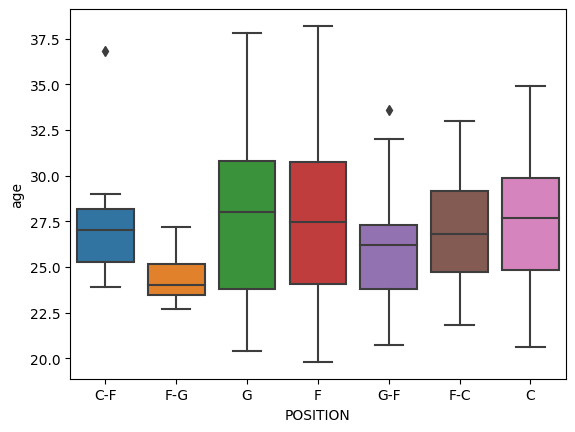

In [32]:
#realizamos una comparacion entre la edad y sus posiciones
#se puede observar que lo que mas abunda son Ala y escoltas.
sns.boxplot(x = 'POS', y = 'AGE', data = df_NBA)
plt.xlabel('POSITION')
plt.ylabel('age')

la media que tiene los jugadores NBA en puntos es al rededor de los 18 punots por partido, realizamos la comprobacion.

In [33]:
# la media que tiene los jugadores NBA en puntos es al rededor de los 18 punots por partido.
points = df_NBA['PPG'].mean()
print(points)

17.535


In [34]:

test_result= ttest(x=df_NBA['PPG'],y=18,alternative='two-sided')

print(test_result)

               T  dof alternative     p-val        CI95%  cohen-d   BF10  \
T-test -0.922495  159     greater  0.821166  [16.7, inf]  0.07293  0.267   

           power  
T-test  0.005182  


Mi hypotesis es que los jovenes de la NBA meten mas puntos que las viejas glorias.

In [26]:
news_players = df_NBA[df_NBA['AGE']<=27]['PPG'].mean()
olds_players = df_NBA[df_NBA['AGE']>27]['PPG'].mean()

print(news_players)
print(olds_players)

17.652439024390247
17.41153846153846


In [28]:
test_result= ttest(x=df_NBA[df_NBA['AGE']<=27]['PPG'],y=df_NBA[df_NBA['AGE']>27]['PPG'],alternative='greater')

print(test_result)

               T         dof alternative     p-val         CI95%  cohen-d  \
T-test  0.237285  152.030847     greater  0.406378  [-1.44, inf]  0.03767   

        BF10    power  
T-test  0.35  0.07961  


podemos comprobar que los jovenes no meten mas puntos que los viejos.

Realizaremos una comprobacion de posiciones de los jugadores y caules osn las que meten mas puntos.

In [35]:

mean_by_position = df_NBA.groupby('POS')['PPG'].mean()
print(mean_by_position)

POS
C      15.108333
C-F    17.985714
F      17.171429
F-C    17.909091
F-G    22.014286
G      17.718462
G-F    17.150000
Name: PPG, dtype: float64


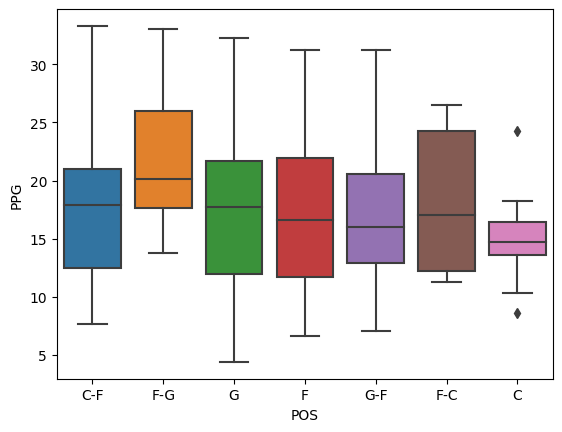

In [37]:
sns.boxplot(y='PPG',x='POS',data =df_NBA)
plt.show()

Podemos ver poca diferencia entre diferencia posiciones, menos ala-pivot que tiene una buena diferencia.

In [40]:
anova_result = anova(data= df_NBA,dv='PPG',between='POS')

print(anova_result)

  Source  ddof1  ddof2         F     p-unc       np2
0    POS      6    153  0.916182  0.485002  0.034683


no existe diferencia significativa entre posiciones de los jugadores.

Para temrinar comprobaremos si se metian mas puntos este año que en los años anteriores.